## Source Data


Two data files are shared by store owner -


*   stock_DUMP.xlsx
*   grocery_sales_feb_Mar_Apr_2024.xlsx

**stock_DUMP.xlsx**

- This file holds all the products sold by **Alpha Mart** along with their Current Stock, MRP, Purchase price, cost price and barcode details.
- Metadata -
  * 2683 Rows
  * Columns :
        'Code', 'Product Name', 'Unit', 'Current Stock', 'Sales Scheme',
        'Unnamed: 5', 'Purc.Scheme', 'Unnamed: 7', 'Cost Price', 'M.R.P.',
        'Purchase Price', 'Sales Price', 'Company', 'Manufacturer', 'Rack No.',
        'Barcode'

**grocery_sales_feb_Mar_Apr_2024.xlsx**

- This file holds all transactional details by **Alpha Mart** for the three month time period (Feb/March/April 2024).
- Metadata -
  * 26822 Rows
  * Columns :
       'Transaction_ID', 'Order_Date', 'Customer_ID', 'item_num',    'item_code', 'Item', 'Quantity', 'MRP', 'Sale_price', 'discount', 'Total_Price', 'Payment_method'

In [1]:
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

import random
from datetime import date, timedelta

#To plot pretty pictures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlt

#Global Matplot setting
mlt.rc('figure',figsize=(6,5))
mlt.rc('axes',labelsize=8)
mlt.rc('xtick',labelsize=8)
mlt.rc('ytick',labelsize=8)

In [2]:
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings
!export PYTHONWARNINGS="ignore"
!pip install mlxtend
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.3 MB/s eta 0:00:00


## **Data Acquisition and Preparation**

In [3]:
##Getting file from GoogleDrive
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


In [4]:
# Reading Stocks data
stock_data = pd.read_excel("/drive/My Drive/BDM_Project_Docs/stock_DUMP.xlsx", skiprows=2)

In [5]:
!pip install openpyxl

In [6]:
stock_data.columns, stock_data.shape

(Index(['Code', 'Product Name', 'Unit', 'Current Stock', 'Sales Scheme',
        'Unnamed: 5', 'Purc.Scheme', 'Unnamed: 7', 'Cost Price', 'M.R.P.',
        'Purchase Price', 'Sales Price', 'Company', 'Manufacturer', 'Rack No.',
        'Barcode'],
       dtype='object'),
 (2684, 16))

In [7]:
# Reading Transaction data
txn_data = pd.read_excel("/drive/My Drive/BDM_Project_Docs/grocery_sales_feb_Mar_Apr_2024.xlsx", skiprows=0)
len(txn_data)

26822

In [8]:
## columns and row validation
print(txn_data.columns, txn_data.shape)
txn_data.head(5)

Index(['Transaction_ID', 'Order_Date', 'Customer_ID', 'item_num', 'Item',
       'Quantity', 'MRP', 'Sale_price', 'discount', 'Total_Price',
       'Payment_method'],
      dtype='object') (26822, 11)


,Transaction_ID,Order_Date,Customer_ID,item_num,Item,Quantity,MRP,Sale_price,discount,Total_Price,Payment_method
0,A008546,2024-02-01,0,1,HIM BABY WIPES 24N,2,85.0,85.0,0.0%,170.0,Paytm Scan
1,A008546,2024-02-01,0,2,500G KHIR CHAWAL,3,50.0,50.0,0.0%,150.0,Paytm Scan
2,A008546,2024-02-01,0,3,ANCHOR CLOVE TOOTHPASTE 175G,9,62.0,62.0,0.0%,558.0,Paytm Scan
3,A009767,2024-02-01,0,1,CYCLE BRAND LIA SAMTRUPTI 56G,1,30.0,30.0,0.0%,30.0,CASH
4,A010322,2024-02-01,0,1,MARIE GOLD,9,10.0,10.0,0.0%,90.0,Paytm Scan


## **EDA (Exploratory Data Analysis)**

**`1. Stock Data Analysis`**



In [9]:
print(stock_data.info())
print ("Column names", stock_data.columns)

## Cleaning extra columns
selected_columns= ['Code', 'Product Name', 'Unit', 'Current Stock', 'Cost Price', 'M.R.P.',
       'Purchase Price', 'Sales Price', 'Company',
]

stock_df= stock_data[selected_columns]

## droping 1st row

# Drop the first row
stock_df = stock_df.drop(stock_df.index[0])

stock_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684 entries, 0 to 2683
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            2683 non-null   float64
 1   Product Name    2683 non-null   object 
 2   Unit            2683 non-null   object 
 3   Current Stock   2683 non-null   float64
 4   Sales Scheme    2684 non-null   object 
 5   Unnamed: 5      2684 non-null   object 
 6   Purc.Scheme     2684 non-null   object 
 7   Unnamed: 7      2684 non-null   object 
 8   Cost Price      2683 non-null   float64
 9   M.R.P.          2683 non-null   float64
 10  Purchase Price  2683 non-null   float64
 11  Sales Price     2683 non-null   float64
 12  Company         2683 non-null   object 
 13  Manufacturer    0 non-null      float64
 14  Rack No.        0 non-null      float64
 15  Barcode         2552 non-null   object 
dtypes: float64(8), object(8)
memory usage: 335.6+ KB
None
Column names Index(['Cod

,Code,Product Name,Unit,Current Stock,Cost Price,M.R.P.,Purchase Price,Sales Price,Company
1,1296.0,BABY CARE COLLECTION,PCS,2.0,329.60,400.0,290.97,400.0,JOHNSON & JOHSONS
2,9620.0,500G KHIR CHAWAL,PCS,-1.0,0.00,50.0,0.00,50.0,MANYATA
3,1294.0,BABY CARE COLLECTION,PCS,3.0,189.53,230.0,167.31,210.0,JOHNSON & JOHSONS
4,1315.0,BABY POWDER 100G,PCS,4.0,67.26,83.0,60.64,83.0,JOHNSON & JOHSONS
5,1314.0,BABY POWDER 200G,PCS,3.0,121.55,150.0,109.58,150.0,JOHNSON & JOHSONS
...,...,...,...,...,...,...,...,...,...
2679,10808.0,ZANDU BALM ULTRA POWER,PCS,18.0,36.51,48.0,33.26,48.0,EMAMI
2680,1374.0,ZIG ZAG +,PCS,-1.0,18.09,30.0,18.83,30.0,COLGATE
2681,3.0,ZZZZZZ 3,PCS,-3.0,0.00,31.0,24.00,31.0,EVEREST
2682,2584.0,ÉCLAIR TOFF 277G(POUCH),PCS,-4.0,43.48,50.0,38.82,50.0,PARLE


In [10]:
# prompt: check null values
print(stock_df.isnull().sum())

Code              0
Product Name      0
Unit              0
Current Stock     0
Cost Price        0
M.R.P.            0
Purchase Price    0
Sales Price       0
Company           0
dtype: int64


In [11]:
# prompt: check uniques in each column

# Check unique values in each column
for col in stock_df.columns:
  print(f"Unique values in {col}: {stock_df[col].nunique()}")


Unique values in Code: 2683
Unique values in Product Name: 2681
Unique values in Unit: 5
Unique values in Current Stock: 219
Unique values in Cost Price: 1593
Unique values in M.R.P.: 338
Unique values in Purchase Price: 1541
Unique values in Sales Price: 342
Unique values in Company: 212


In [12]:
## Number of unique product names 2681 out of 2683

In [13]:
#Finding data anomaliues

In [14]:
# prompt: check of negative values in numerical fields

# Check for negative values in numerical fields
numerical_cols = [ 'Current Stock', 'Cost Price', 'M.R.P.', 'Purchase Price', 'Sales Price']
for col in numerical_cols:
  #print (col)
  stock_df[col]=stock_df[col].astype(float)
  negative_values = stock_df[stock_df[col] < 0][col]
  if not negative_values.empty:
    print(f"Negative values found in column '{col}':\n{negative_values}")


Negative values found in column 'Current Stock':
2        -1.0
6      -166.0
8       -10.0
9       -44.0
10      -18.0
        ...  
2676     -2.0
2677     -1.0
2680     -1.0
2681     -3.0
2682     -4.0
Name: Current Stock, Length: 849, dtype: float64


In [15]:
### Inference :
## 'Current Stock' cannot be negative and since this field is not giving any significant help we are removing it.
## Data validation shows 'Current Stock' field, which cannot be negative and is being removed due to its insignificance.

stock_df = stock_df.drop(columns=['Current Stock'])


In [16]:
# prompt: check 'M.R.P.' is greater than 'Purchase Price'

# Check if 'M.R.P.' is greater than 'Purchase Price'
invalid_mrp = stock_df[stock_df['M.R.P.'] < stock_df['Purchase Price']]
if not invalid_mrp.empty:
  print("Found records where 'M.R.P.' is less than or equal to 'Purchase Price':")
  print(invalid_mrp[['Code', 'Product Name', 'M.R.P.', 'Purchase Price']])
else:
  print("All 'M.R.P.' values are greater than 'Purchase Price'.")


Found records where 'M.R.P.' is less than or equal to 'Purchase Price':
         Code Product Name  M.R.P.  Purchase Price
2353  10345.0  SPOON MRP 1     1.0            6.25


In [17]:
# prompt: check 'M.R.P.' is greater than 'sales Price'

# Check if 'M.R.P.' is greater than 'Sales Price'
invalid_mrp = stock_df[stock_df['M.R.P.'] < stock_df['Sales Price']]
if not invalid_mrp.empty:
  print("Found records where 'M.R.P.' is less than or equal to 'Sales Price':")
  print(invalid_mrp[['Code', 'Product Name', 'M.R.P.', 'Sales Price']])
else:
  print("All 'M.R.P.' values are greater than 'Sales Price'.")


Found records where 'M.R.P.' is less than or equal to 'Sales Price':
         Code                 Product Name  M.R.P.  Sales Price
10     2912.0            24 KERAT RICE 2KG    90.0         92.0
11     9807.0               24K RICE 25 KG  1075.0       1090.0
24     9079.0  AER POCKET (FLORAL DELIGHT)    55.0         60.0
37     9737.0                    AJINAMOTO    60.0        100.0
39     9266.0                 AJWAIN 100GM    21.0         22.0
...       ...                          ...     ...          ...
2489   9502.0     TIDE FRESH & CLEAN 1 K.G    69.0         75.0
2502   9739.0                  TITRIK 1K.G   330.0        400.0
2535  10570.0                TRUPATI PATTA   110.0        115.0
2653   2352.0               YARDLEY BREEZE   190.0        199.0
2676   2360.0             YARDLEY RED ROSE   190.0        199.0

[100 rows x 4 columns]


In [18]:
# prompt: check 'Sales Price' is greater than 'Purchase Price'

# Check if 'Sales Price' is greater than 'Purchase Price'
invalid_sales_price = stock_df[stock_df['Sales Price'] < stock_df['Purchase Price']]
if not invalid_sales_price.empty:
  print("Found records where 'Sales Price' is less than 'Purchase Price':")
  print(invalid_sales_price[['Code', 'Product Name', 'Sales Price', 'Purchase Price']])
else:
  print("All 'Sales Price' values are greater than 'Purchase Price'.")


Found records where 'Sales Price' is less than 'Purchase Price':
         Code           Product Name  Sales Price  Purchase Price
123    3475.0    AXE SIGNATURE SUAVE         44.0          140.01
168    9749.0            BESAN 10K.G         88.0          850.00
420    9750.0           CHINI 50 K.G       1970.0         1975.00
476    9574.0   COLGATE PAIN OUT 15G          0.0           46.58
510    8762.0  COTTON BUDS (100 PCS)         30.0           52.76
695    9720.0         DRY DATES 250G         55.0           67.50
1177   2854.0              HAND WASH         15.0           37.67
1703   8477.0             MAIDA 500G         13.5           20.00
1705    729.0        MAKHANA - 250GM        120.0          125.00
2353  10345.0            SPOON MRP 1          1.0            6.25
2507   1080.0           TOOR DAL 1KG        153.0          155.00
2508   9623.0          TOOR DAL 500G         68.0           77.50


In [19]:
# prompt: statistical analysis on numerical fields

# Select numerical columns
numerical_cols = ['Cost Price', 'M.R.P.', 'Purchase Price', 'Sales Price']

# Calculate descriptive statistics
stats = stock_df[numerical_cols].describe()

print(stats)


        Cost Price       M.R.P.  Purchase Price  Sales Price
count  2683.000000  2683.000000     2683.000000  2683.000000
mean     94.756075   145.485445      102.111681   146.147876
std     144.693635   218.207233      170.684656   220.322236
min       0.000000     1.000000        0.000000     0.000000
25%      16.660000    38.000000       23.715000    38.000000
50%      53.670000    81.000000       57.200000    82.000000
75%     124.580000   175.000000      121.160000   175.000000
max    2750.020000  3350.000000     2619.040000  3350.000000


**`2. Transaction Data Analysis`**


In [20]:
print(txn_data.info())
print ("Column names", txn_data.columns)

# prompt: check null values
print(txn_data.isnull().sum())

txn_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26822 entries, 0 to 26821
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  26822 non-null  object 
 1   Order_Date      26822 non-null  object 
 2   Customer_ID     26822 non-null  int64  
 3   item_num        26822 non-null  int64  
 4   Item            26822 non-null  object 
 5   Quantity        26822 non-null  int64  
 6   MRP             26822 non-null  float64
 7   Sale_price      26822 non-null  float64
 8   discount        25641 non-null  object 
 9   Total_Price     26822 non-null  float64
 10  Payment_method  26133 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 2.3+ MB
None
Column names Index(['Transaction_ID', 'Order_Date', 'Customer_ID', 'item_num', 'Item',
       'Quantity', 'MRP', 'Sale_price', 'discount', 'Total_Price',
       'Payment_method'],
      dtype='object')
Transaction_ID       0
Order_Date    

,Transaction_ID,Order_Date,Customer_ID,item_num,Item,Quantity,MRP,Sale_price,discount,Total_Price,Payment_method
0,A008546,2024-02-01,0,1,HIM BABY WIPES 24N,2,85.0,85.0,0.0%,170.0,Paytm Scan
1,A008546,2024-02-01,0,2,500G KHIR CHAWAL,3,50.0,50.0,0.0%,150.0,Paytm Scan
2,A008546,2024-02-01,0,3,ANCHOR CLOVE TOOTHPASTE 175G,9,62.0,62.0,0.0%,558.0,Paytm Scan
3,A009767,2024-02-01,0,1,CYCLE BRAND LIA SAMTRUPTI 56G,1,30.0,30.0,0.0%,30.0,CASH
4,A010322,2024-02-01,0,1,MARIE GOLD,9,10.0,10.0,0.0%,90.0,Paytm Scan
...,...,...,...,...,...,...,...,...,...,...,...
26817,A032606,2024-04-30,0,1,PEDIASURE VAN JAR 400GM,1,650.0,650.0,0.0%,650.0,Paytm Scan
26818,A005096,2024-04-30,0,1,HALDIRAM'S TASTY GUP SHUP 200GM,7,56.0,56.0,0.0%,392.0,CASH
26819,A005096,2024-04-30,0,2,MOONG DAL 500G,8,51.0,51.0,0.0%,408.0,CASH
26820,A005096,2024-04-30,0,3,DALCHINI 200G,4,80.0,75.0,6.2%,300.0,CASH


In [21]:
 # Customer_ID can be dropped from Analysis
txn_df = txn_data.drop(columns=['Customer_ID'])


In [22]:
# Get summary statistics for numerical columns
txn_stats = txn_df.describe()

# Get data types and missing values information
txn_info = txn_df.info()

# Get the number of missing values in each column
txn_na = txn_df.isnull().sum()
print(txn_na)

print("**Transaction Data Summary**\n")

print("The `txn_df` dataframe contains information about grocery sales transactions, with the following key observations:")

print("\n**Numerical Columns:**")
print(f"  - The `Quantity` column has a mean of {txn_stats['Quantity']['mean']:.2f} and a standard deviation of {txn_stats['Quantity']['std']:.2f}, indicating the average quantity sold per transaction and the variability around that average.")
print(f"  - The `MRP` column shows an average Maximum Retail Price of {txn_stats['MRP']['mean']:.2f} with a standard deviation of {txn_stats['MRP']['std']:.2f}.")
print(f"  - The `Sale_price` column has an average sale price of {txn_stats['Sale_price']['mean']:.2f} and a standard deviation of {txn_stats['Sale_price']['std']:.2f}, indicating the average selling price per transaction.")
# The column name was 'Total_Price', not 'discount'
print(f"  - The `Total_Price` column shows an average total price of {txn_stats['Total_Price']['mean']:.2f} with a standard deviation of {txn_stats['Total_Price']['std']:.2f}.")

print("\n**Categorical Columns:**")
print("  - The `Transaction_ID` column appears to be a unique identifier for each transaction.")
print("  - The `Order_Date` column records the date of each transaction.")
print("  - The `item_num` column likely represents a unique identifier for each item within a transaction.")
print("  - The `Item` column contains the name of the item sold.")
print("  - The `Payment_method` column indicates the method used for payment.")

print("\n**Missing Values:**")
print("  - Based on the `.isnull()` method, NULL values are present in columns `discount` and `Payment_method` the dataset.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26822 entries, 0 to 26821
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  26822 non-null  object 
 1   Order_Date      26822 non-null  object 
 2   item_num        26822 non-null  int64  
 3   Item            26822 non-null  object 
 4   Quantity        26822 non-null  int64  
 5   MRP             26822 non-null  float64
 6   Sale_price      26822 non-null  float64
 7   discount        25641 non-null  object 
 8   Total_Price     26822 non-null  float64
 9   Payment_method  26133 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 2.0+ MB
Transaction_ID       0
Order_Date           0
item_num             0
Item                 0
Quantity             0
MRP                  0
Sale_price           0
discount          1181
Total_Price          0
Payment_method     689
dtype: int64
**Transaction Data Summary**

The `txn_df` dat

## Data Transformation and Visualization

In [23]:
# Select numerical columns
numerical_cols = ['Quantity', 'MRP', 'Sale_price', 'discount', 'Total_Price']

# Calculate descriptive statistics
txn_stats = txn_df[numerical_cols].describe()

print(txn_stats)

           Quantity           MRP    Sale_price   Total_Price
count  26822.000000  26822.000000  26822.000000  26822.000000
mean       4.690254    140.216516    139.699627    521.129678
std        2.592178    228.266413    227.821906    668.225272
min        1.000000      1.000000      0.000000      0.000000
25%        2.000000     38.000000     38.000000    132.000000
50%        4.000000     75.000000     75.000000    315.000000
75%        7.000000    150.000000    150.000000    680.000000
max        9.000000   3350.000000   3350.000000  13400.000000


In [24]:
# Check for duplicates based on 'Code'
duplicates_code = stock_df[stock_df.duplicated(subset=['Code'], keep='first')]
if not duplicates_code.empty:
  print("Duplicate records found based on 'Code':")
  print(duplicates_code)
else:
  print("No duplicate records found based on 'Code'.")

# Check for duplicates based on 'Product Name'
duplicates_name = stock_df[stock_df.duplicated(subset=['Product Name'], keep='first')]
if not duplicates_name.empty:
  print("Duplicate records found based on 'Product Name':")
  print(duplicates_name)
else:
  print("No duplicate records found based on 'Product Name'.")

No duplicate records found based on 'Code'.
Duplicate records found based on 'Product Name':
        Code       Product Name Unit  Cost Price  M.R.P.  Purchase Price  \
2533  1680.0  TRIPLE CARE COLOR  PCS      580.35   650.0          491.82   
2534  1681.0  TRIPLE CARE COLOR  PCS      553.56   620.0          469.12   

      Sales Price Company  
2533        650.0  LOREAL  
2534        620.0  LOREAL  


In [25]:
# Remove records with product code 1680
stock_df = stock_df[stock_df['Code'] != 1680]
len(stock_df)

2682

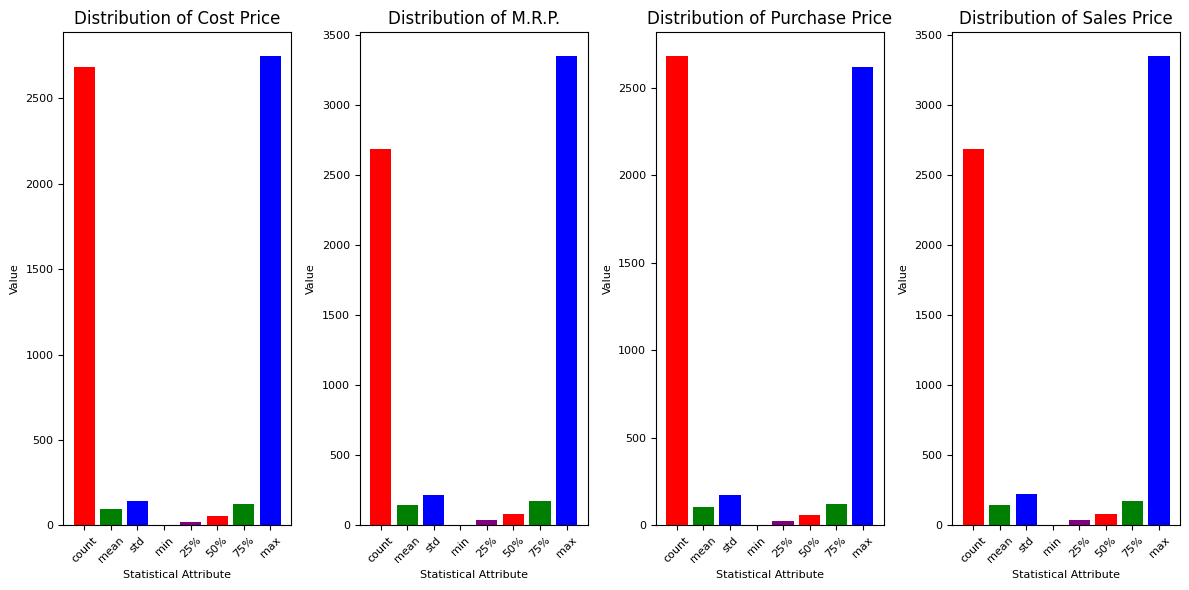

In [26]:
# prompt: Create separate plot for each column with different color combination for each statistical attribute. Only consider stocks_df for this analysis. Rotate the axis or adjust ratio as statistical attributes are not clear. Display two plot on one row. In this code update the headings

import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = ['Cost Price', 'M.R.P.', 'Purchase Price', 'Sales Price']

# Calculate descriptive statistics
stats = stock_df[numerical_cols].describe()

# Create subplots
# Updated ncols to match the number of numerical columns
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

# Plot each column
for i, col in enumerate(numerical_cols):
  ax = axes[i]
  # Extract data for the column
  data = stats[col]

  # Create a bar plot
  ax.bar(data.index, data.values, color=['red', 'green', 'blue', 'orange', 'purple'])

  # Set title and labels
  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel('Statistical Attribute')
  ax.set_ylabel('Value')

  # Rotate x-axis labels for better readability
  ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



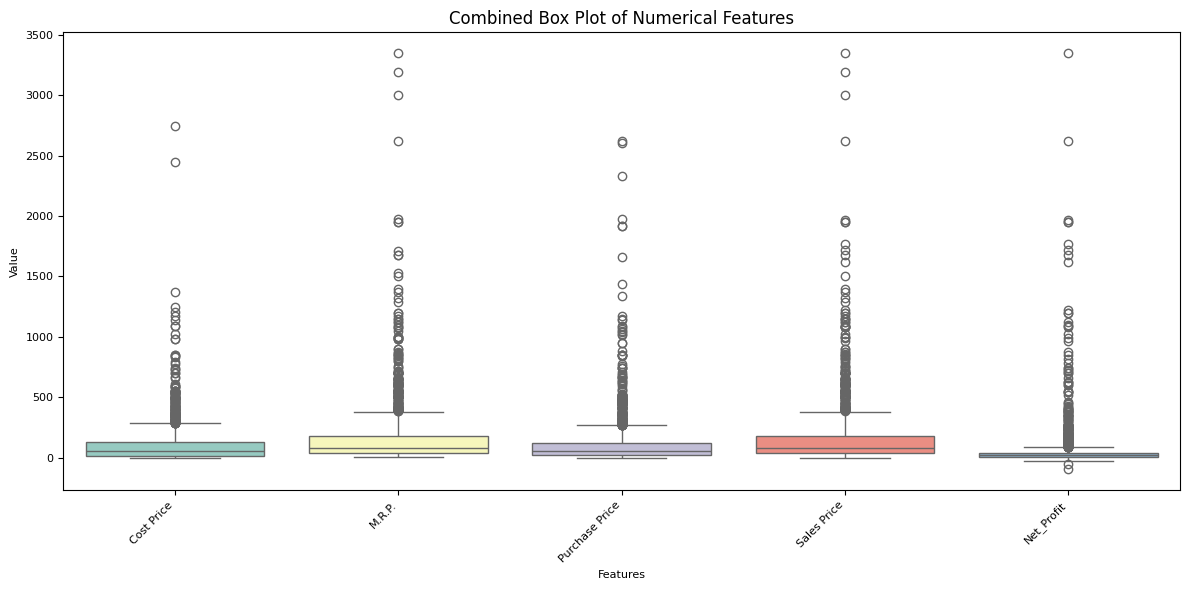

In [46]:
# prompt: Add a column called Net_Profit in DF (which sale price - cost price. )  .Create a combined box plot for each column with different color combination for each statistical attribute. Only consider stocks_df for this analysis. Rotate the axis or adjust ratio as statistical attributes are not clear. In this code update the headings. and ensure to keep in single visual

# Create the 'Net_Profit' column
stock_df['Net_Profit'] = stock_df['Sales Price'] - stock_df['Cost Price']

# Create a combined box plot for each column with different color combinations
numerical_cols = ['Cost Price', 'M.R.P.', 'Purchase Price', 'Sales Price', 'Net_Profit']

plt.figure(figsize=(12, 6))
sns.boxplot(data=stock_df[numerical_cols], palette='Set3')  # Choose a color palette

plt.title('Combined Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [47]:
# set discount as Zero and payment mode to CASH wherever there is NULL

# Fill NaN values in 'discount' column with 0
txn_df['discount'].fillna(0, inplace=True)

# Fill NaN values in 'Payment_method' column with 'CASH'
txn_df['Payment_method'].fillna('CASH', inplace=True)


**Combining both datasets**

---



In [48]:
# prompt: combine txn_df and stocks_df by performing left join on item_name, ensuring duplicate columns ('Product Name','M.R.P.','Sales Price') are not present.
# Also, re-arrange columns to keep Item & Item code nearby, MRP followed by Discount and then Sales Price

import pandas as pd
# Merge the dataframes using a left join on 'Item'
combined_df = pd.merge(txn_df, stock_df, left_on='Item', right_on='Product Name', how='left')

# Drop duplicate columns
combined_df = combined_df.drop(columns=['Product Name', 'M.R.P.', 'Sales Price'])
print(combined_df.columns)

# Re-arrange columns
column_order = ['Transaction_ID', 'Order_Date', 'item_num', 'Code', 'Item', 'Quantity', 'MRP', 'discount', 'Sale_price', 'Total_Price', 'Payment_method',
                'Unit', 'Cost Price', 'Purchase Price', 'Company']
combined_df = combined_df[column_order]

# Extract the month from the 'Order_Date' column
combined_df['Order_Month'] = pd.to_datetime(combined_df['Order_Date']).dt.month

# prompt: Update Company from -BLANK-    to  ALPHA-MART

# Replace '-BLANK-' with 'ALPHA-MART' in the 'Company' column
combined_df['Company'] = combined_df['Company'].replace('-BLANK-', 'ALPHA-MART')



Index(['Transaction_ID', 'Order_Date', 'item_num', 'Item', 'Quantity', 'MRP',
       'Sale_price', 'discount', 'Total_Price', 'Payment_method', 'Code',
       'Unit', 'Cost Price', 'Purchase Price', 'Company', 'Net_Profit'],
      dtype='object')


In [29]:
combined_df.info()
combined_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26841 entries, 0 to 26840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  26841 non-null  object 
 1   Order_Date      26841 non-null  object 
 2   item_num        26841 non-null  int64  
 3   Code            26841 non-null  float64
 4   Item            26841 non-null  object 
 5   Quantity        26841 non-null  int64  
 6   MRP             26841 non-null  float64
 7   discount        26841 non-null  object 
 8   Sale_price      26841 non-null  float64
 9   Total_Price     26841 non-null  float64
 10  Payment_method  26841 non-null  object 
 11  Unit            26841 non-null  object 
 12  Cost Price      26841 non-null  float64
 13  Purchase Price  26841 non-null  float64
 14  Company         26841 non-null  object 
 15  Order_Month     26841 non-null  int32  
dtypes: float64(6), int32(1), int64(2), object(7)
memory usage: 3.2+ MB


,Transaction_ID,Order_Date,item_num,Code,Item,Quantity,MRP,discount,Sale_price,Total_Price,Payment_method,Unit,Cost Price,Purchase Price,Company,Order_Month
0,A008546,2024-02-01,1,2280.0,HIM BABY WIPES 24N,2,85.0,0.0%,85.0,170.0,Paytm Scan,PCS,63.72,54.00,HIMALAYA,2
1,A008546,2024-02-01,2,9620.0,500G KHIR CHAWAL,3,50.0,0.0%,50.0,150.0,Paytm Scan,PCS,0.00,0.00,MANYATA,2
2,A008546,2024-02-01,3,5711.0,ANCHOR CLOVE TOOTHPASTE 175G,9,62.0,0.0%,62.0,558.0,Paytm Scan,PCS,0.00,43.22,ANCHOR CONSUMER PRODUCTS PVT LTD,2
3,A009767,2024-02-01,1,11227.0,CYCLE BRAND LIA SAMTRUPTI 56G,1,30.0,0.0%,30.0,30.0,CASH,PCS,25.00,23.81,CYCLE,2
4,A010322,2024-02-01,1,857.0,MARIE GOLD,9,10.0,0.0%,10.0,90.0,Paytm Scan,PCS,0.00,0.00,BRITANNIA,2


In [49]:
# prompt: Check for duplicate records in combined_df. If exists, get the product code and product name from duplicate set for duplicates.
# Remove exact row level duplicate record from combined_df , with keeping 1 records from identified duplicate set. Finally give the result in new DF.
# Compare count before and after

# Check for duplicate records in combined_df
duplicate_rows = combined_df[combined_df.duplicated(keep=False)]

if not duplicate_rows.empty:
  print("Duplicate records found:")
  print(duplicate_rows[['Code', 'Item']].drop_duplicates())
else:
  print("No duplicate records found.")

# Remove exact row level duplicate record from combined_df, keeping 1 record
combined_df_no_duplicates = combined_df.drop_duplicates(keep='first')

# Compare count before and after
print(f"Count before removing duplicates: {len(combined_df)}")
print(f"Count after removing duplicates: {len(combined_df_no_duplicates)}")

# Create a new DataFrame with the result
result_df = combined_df_no_duplicates

# Convert 'discount' column to numerical values
result_df['discount'] = result_df['discount'].str.rstrip('%').astype('float') / 100  # Convert percentage strings to numerical values

result_df['Net_Profit'] = result_df['Sale_price'] - result_df['Cost Price']


result_df.head(2)

Duplicate records found:
          Code                            Item
712    10421.0              SAFED MARICH 200GM
784    10635.0                       GO CHEESE
1035   11157.0                     PARLE 20-20
1156   10713.0             CAF GREEN PEAS 500G
1171   10683.0                CHINI BOLD 1 K.G
2485   11204.0                BESAN LOOSE 1K.G
2833   10545.0                     JAVITRI 50G
2844   10490.0                      ELAYCHI 5G
4278   10634.0               SOAP CASE 3 STAND
4611   11246.0                 R.R MATCHES BOX
4612   10894.0           TONGUE CLEANER COPPER
6391   10912.0   AJANTA ORANGE RED FOOD COLOUR
8256   10756.0            SHIVSAKTI ATTA 25K.G
8585   10480.0              SARVOTTAM BREAD 40
8619   11009.0                  CARRY BAG MRP1
9263   10773.0         BHAGALPUR KATARNI 25K.G
9276   11054.0                 TEA VALLEY 250G
9419   10757.0               PANCH PHURAN 250G
9761   10347.0               BADI ELAYCHI 100G
9921   11092.0                  URA

,Transaction_ID,Order_Date,item_num,Code,Item,Quantity,MRP,discount,Sale_price,Total_Price,Payment_method,Unit,Cost Price,Purchase Price,Company,Order_Month,Net_Profit
0,A008546,2024-02-01,1,2280.0,HIM BABY WIPES 24N,2,85.0,0.0,85.0,170.0,Paytm Scan,PCS,63.72,54.0,HIMALAYA,2,21.28
1,A008546,2024-02-01,2,9620.0,500G KHIR CHAWAL,3,50.0,0.0,50.0,150.0,Paytm Scan,PCS,0.00,0.0,MANYATA,2,50.00


In [50]:
# prompt: check for row level duplicate in result_df

# Check for duplicate records in result_df
duplicate_rows = result_df[result_df.duplicated(keep=False)]

if not duplicate_rows.empty:
  print("Duplicate records found:")
  print(duplicate_rows)
else:
  print("No duplicate records found.")


No duplicate records found.


## Descriptive Analysis


---



           Quantity           MRP    Sale_price      discount   Total_Price  \
count  26805.000000  26805.000000  26805.000000  25623.000000  26805.000000   
mean       4.689312    140.605611    140.088394      0.003928    522.070741   
std        2.592467    228.574402    228.131094      0.040534    668.897221   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        2.000000     38.000000     38.000000      0.000000    132.000000   
50%        4.000000     75.000000     75.000000      0.000000    315.000000   
75%        7.000000    150.000000    150.000000      0.000000    680.000000   
max        9.000000   3350.000000   3350.000000      1.000000  13400.000000   

       Purchase Price    Net_Profit  
count    26805.000000  26805.000000  
mean       101.382143     61.005133  
std        201.123446    171.857050  
min          0.000000    -96.920000  
25%         18.000000      8.730000  
50%         49.000000     22.000000  
75%        104.000000 

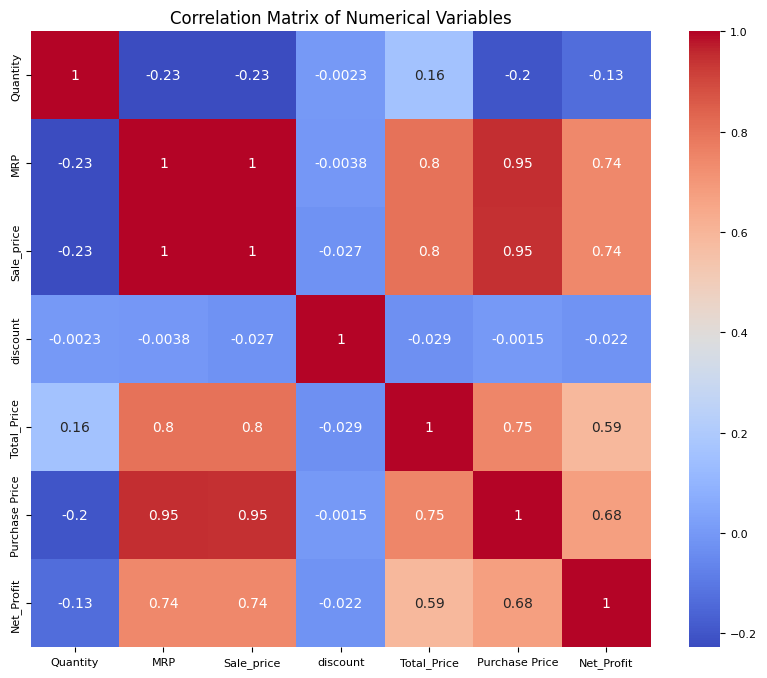

-----------------------------------------------
monthly_sales ->  Month
2    4046074.52
3    5884228.22
4    4063803.47
Name: Total_Price, dtype: float64


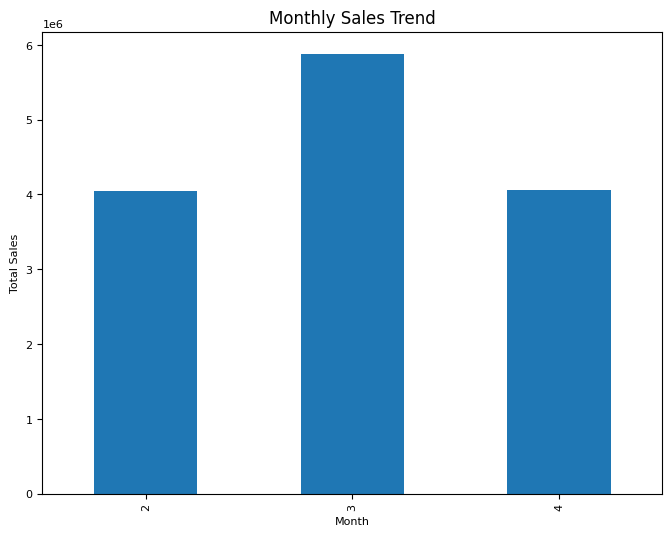

-----------------------------------------------
Item
CHINI 50 K.G               370360.0
BHAGALPUR KATARNI 25K.G    229200.0
LADO SHRI 24K 26KG         224640.0
TIN TIN RICE 10K.G         193375.0
TIRUPATI 24K 26KG          169120.0
ELAYCHI 300G               132000.0
CHIRAUNJI DANA 500G        113400.0
SHIVSAKTI ATTA 25K.G        97240.0
JAVITRI 100G                96480.0
CAF FROZEN GREEN PEAS       90000.0
Name: Total_Price, dtype: float64
Top 10 Best-Selling Products


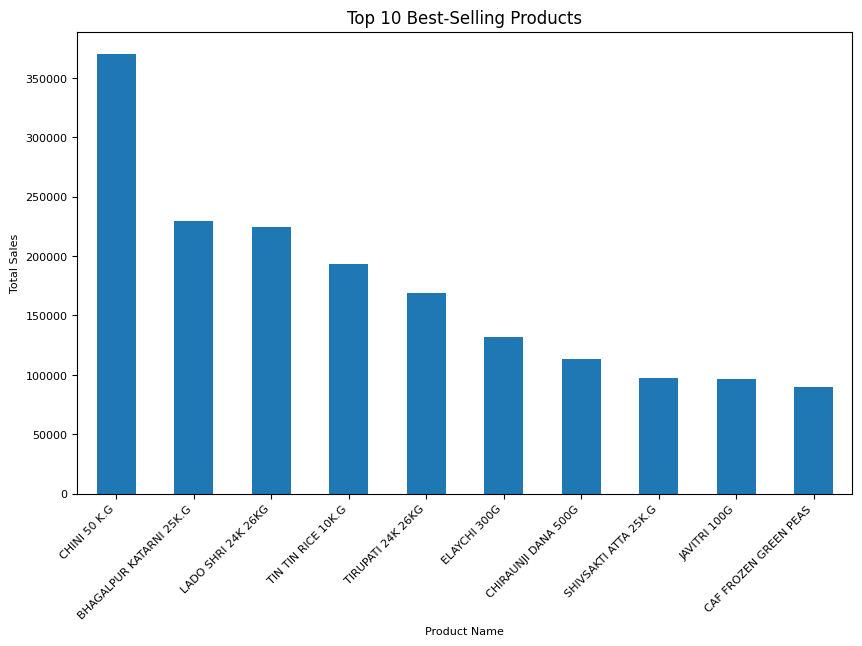

-----------------------------------------------


In [53]:
# prompt: Use result_df for all analysis below.
# Descriptive Analysis: Perform exploratory data analysis to gain insights into sales
# patterns, product performance, and customer behaviour. Utilize statistical techniques
# such as measures of central tendency, dispersion, and correlation to identify trends and
# outliers.

import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns # Added missing import

# Calculate descriptive statistics for numerical columns
numerical_cols = ['Quantity', 'MRP', 'Sale_price', 'discount', 'Total_Price', 'Purchase Price', 'Net_Profit']
desc_stats = result_df[numerical_cols].describe()
print(desc_stats)

print("-----------------------------------------------")
# Calculate correlation matrix
corr_matrix = result_df[numerical_cols].corr()
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

print("-----------------------------------------------")
# Analyze sales patterns by date
result_df['Order_Date'] = pd.to_datetime(result_df['Order_Date'])
result_df['Month'] = result_df['Order_Date'].dt.month
monthly_sales = result_df.groupby('Month')['Total_Price'].sum()
print("monthly_sales -> ", monthly_sales)

# Visualize monthly sales
plt.figure(figsize=(8, 6))
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.show()

print("-----------------------------------------------")
# Analyze product performance
product_sales = result_df.groupby('Item')['Total_Price'].sum().sort_values(ascending=False)
print(product_sales.head(10))

# Visualize top 10 best-selling products
print('Top 10 Best-Selling Products')
plt.figure(figsize=(10, 6))
product_sales.head(10).plot(kind='bar')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45, ha='right')
plt.show()

print("-----------------------------------------------")

Company
ALPHA-MART    4967451.5
HUL           1094877.0
P&G            992167.0
LAKME          373518.0
EVEREST        257666.0
HIMALAYA       237816.0
VANESA         213707.0
PATANJALI      210501.5
NESTLE         193449.0
DABUR          180301.0
Name: Total_Price, dtype: float64
Top 10 Best-Selling Companies


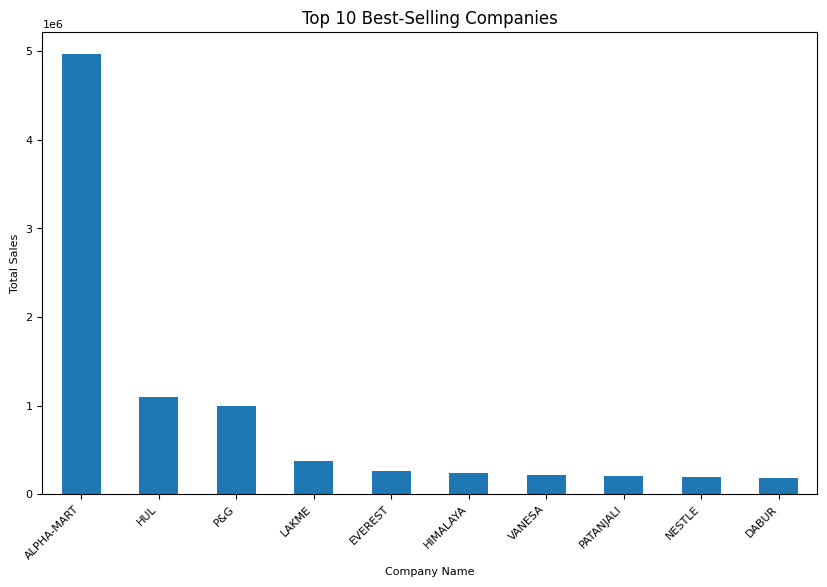

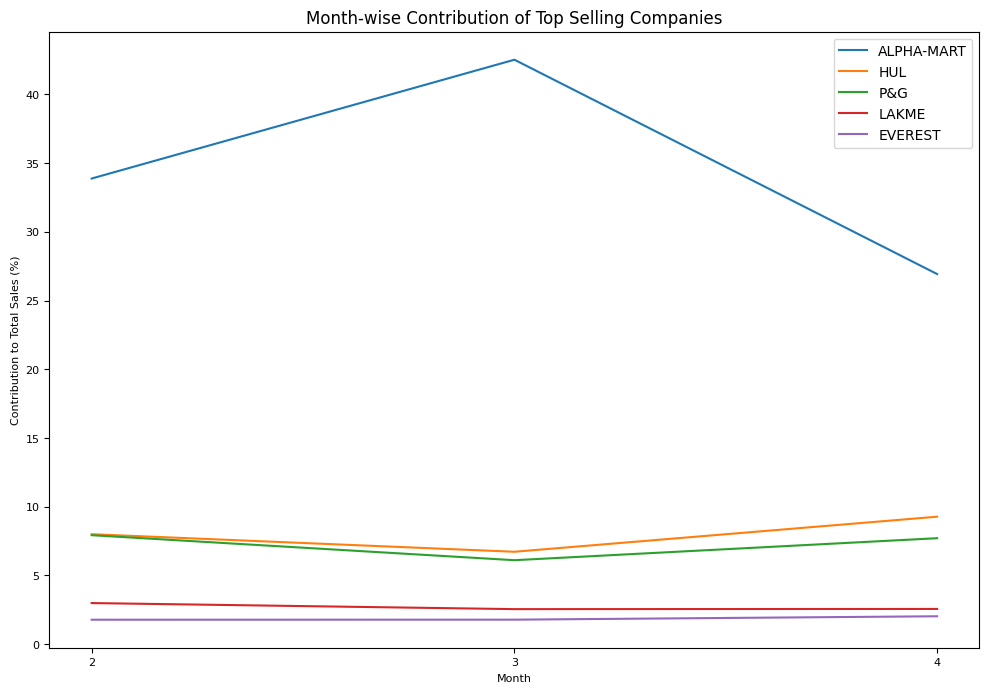

In [54]:
# prompt: Generate similar analysis for top selling 'Company' items, and its contribution to total monthly sales  each month and plot month wise contribution

import matplotlib.pyplot as plt
# Analyze company performance
company_sales = result_df.groupby('Company')['Total_Price'].sum().sort_values(ascending=False)
print(company_sales.head(10))

# Visualize top 10 best-selling companies
print('Top 10 Best-Selling Companies')
plt.figure(figsize=(10, 6))
company_sales.head(10).plot(kind='bar')
plt.xlabel('Company Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Best-Selling Companies')
plt.xticks(rotation=45, ha='right')
plt.show()

# Analyze company contribution to monthly sales
company_monthly_sales = result_df.groupby(['Month', 'Company'])['Total_Price'].sum().reset_index()

# Calculate total sales for each month
monthly_total_sales = company_monthly_sales.groupby('Month')['Total_Price'].sum()

# Calculate the contribution of each company to total monthly sales
company_monthly_sales['Contribution'] = company_monthly_sales['Total_Price'] / company_monthly_sales['Month'].map(monthly_total_sales) * 100

# Plot month-wise contribution of top-selling companies
top_companies = company_sales.head(5).index  # Get the top 5 companies
filtered_data = company_monthly_sales[company_monthly_sales['Company'].isin(top_companies)]

plt.figure(figsize=(12, 8))
for company in top_companies:
  company_data = filtered_data[filtered_data['Company'] == company]
  plt.plot(company_data['Month'], company_data['Contribution'], label=company)

plt.xlabel('Month')
plt.ylabel('Contribution to Total Sales (%)')
plt.title('Month-wise Contribution of Top Selling Companies')
plt.xticks(range(2, 5))  # Assuming months are 2, 3, and 4
plt.legend()
plt.show()


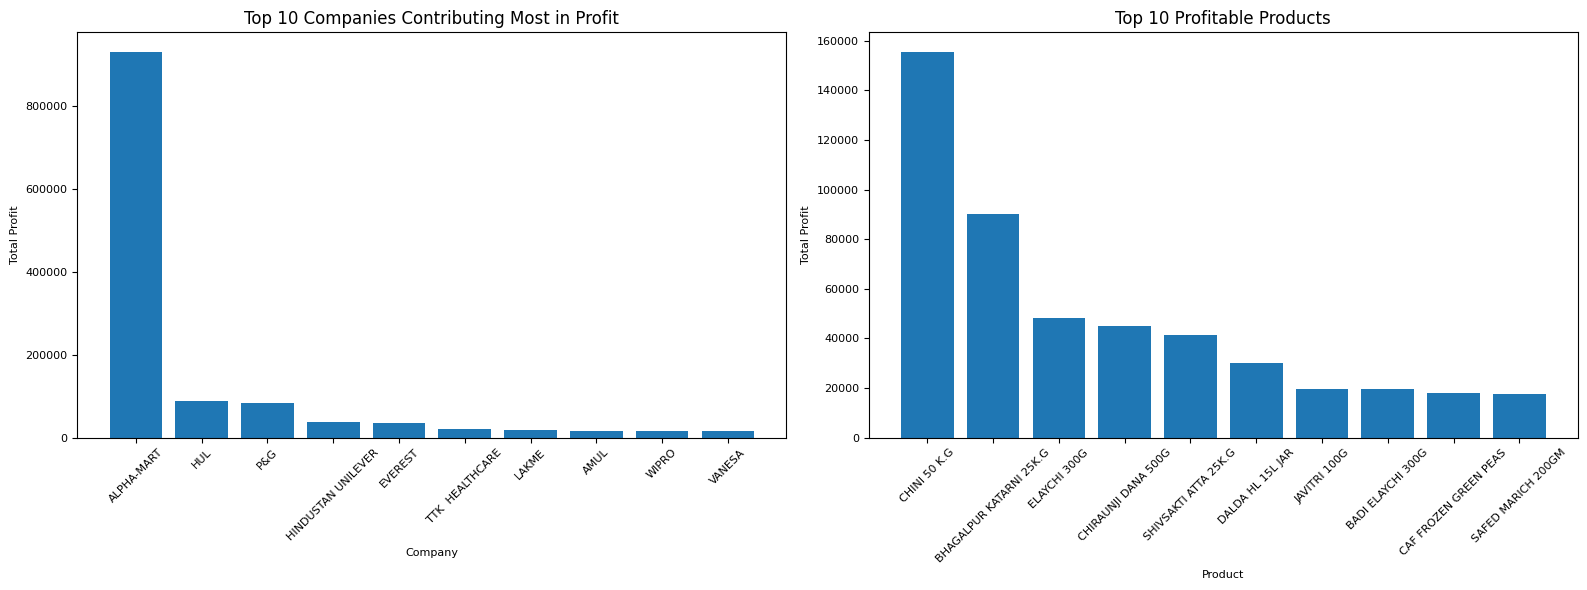


Top Products from Most Profitable Companies:
 Company             Item                   
ALPHA-MART          CHINI 50 K.G               155630.0
                    BHAGALPUR KATARNI 25K.G     90000.0
                    ELAYCHI 300G                48180.0
                    CHIRAUNJI DANA 500G         44800.0
                    SHIVSAKTI ATTA 25K.G        41470.0
HINDUSTAN UNILEVER  DALDA HL 15L JAR            30150.0
ALPHA-MART          BADI ELAYCHI 300G           19440.0
                    JAVITRI 100G                19440.0
                    CAF FROZEN GREEN PEAS       17760.0
                    SAFED MARICH 200GM          17750.0
Name: Net_Profit, dtype: float64
Product: CHINI 50 K.G, Company: ALPHA-MART, Profit Contribution: 9.52%
Product: BHAGALPUR KATARNI 25K.G, Company: ALPHA-MART, Profit Contribution: 5.50%
Product: ELAYCHI 300G, Company: ALPHA-MART, Profit Contribution: 2.95%
Product: CHIRAUNJI DANA 500G, Company: ALPHA-MART, Profit Contribution: 2.74%
Product: SHIVS

In [61]:
# prompt: Also give a code for companies contributing most in profit and top profitable products. Plot for both of them side by side. Also, identify products from most profitables companies which contribute to profit and % of profit these contribute to

# Assuming 'result_df' is your combined dataframe with 'Company' and 'Net_Profit' columns.

# Companies Contributing Most in Profit
company_profit = result_df.groupby('Company')['Net_Profit'].sum().sort_values(ascending=False)

# Top Profitable Products
product_profit = result_df.groupby('Item')['Net_Profit'].sum().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Companies Contributing Most in Profit
axes[0].bar(company_profit.index[:10], company_profit.values[:10])
axes[0].set_title('Top 10 Companies Contributing Most in Profit')
axes[0].set_xlabel('Company')
axes[0].set_ylabel('Total Profit')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

# Plot Top Profitable Products
axes[1].bar(product_profit.index[:10], product_profit.values[:10])
axes[1].set_title('Top 10 Profitable Products')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Total Profit')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

# Identify products from most profitable companies which contribute to profit
top_companies = company_profit.head(5).index  # Get top 5 companies by profit
top_company_products = result_df[result_df['Company'].isin(top_companies)].groupby(['Company', 'Item'])['Net_Profit'].sum().sort_values(ascending=False)


print("\nTop Products from Most Profitable Companies:\n", top_company_products.head(10))


#Calculate % of profit contributed by these products

total_profit = result_df['Net_Profit'].sum()

# Use items() instead of iteritems() to iterate over the index and values
for (company, product), profit in top_company_products.head(10).items():  # Changed iteritems() to items()
  percentage_contribution = (profit / total_profit) * 100
  print(f"Product: {product}, Company: {company}, Profit Contribution: {percentage_contribution:.2f}%")


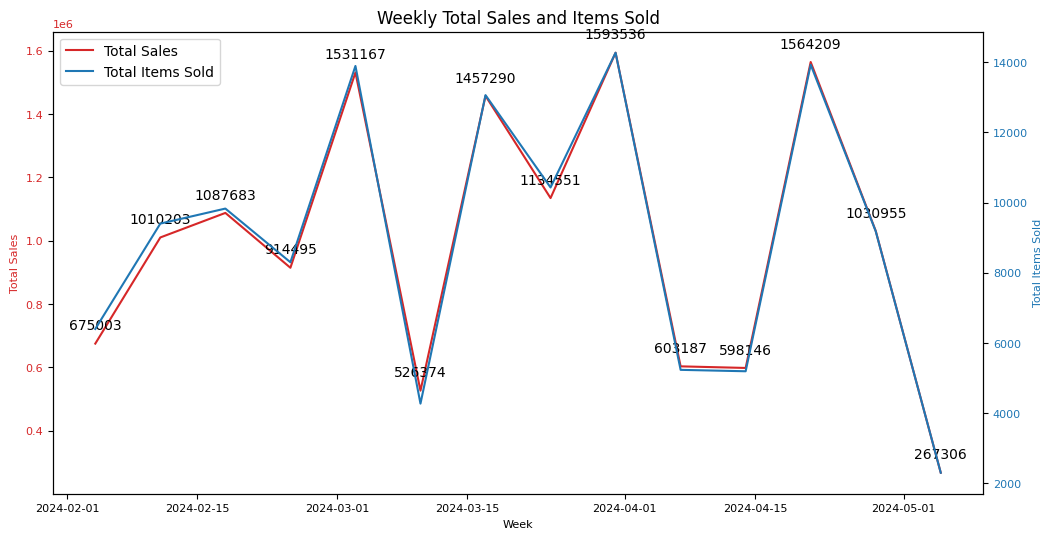

In [34]:
# prompt: give me a time series plot of daily overall sale each week, indicating total amount on each spike. Remove cluttered total amount display for amount < 200000. Give plot wrt to total item sold, overlapping in same plot with different color

import matplotlib.pyplot as plt
# Group data by day and calculate total sales and total items sold
daily_sales = result_df.groupby('Order_Date').agg({'Total_Price': 'sum', 'Quantity': 'sum'})

# Resample the data to weekly frequency and sum the sales and items
weekly_sales = daily_sales.resample('W').sum()

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the total sales
color = 'tab:red'
ax1.set_xlabel('Week')
ax1.set_ylabel('Total Sales', color=color)
ax1.plot(weekly_sales.index, weekly_sales['Total_Price'], color=color, label='Total Sales')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the total items sold
color = 'tab:blue'
ax2.set_ylabel('Total Items Sold', color=color)
ax2.plot(weekly_sales.index, weekly_sales['Quantity'], color=color, label='Total Items Sold')
ax2.tick_params(axis='y', labelcolor=color)

# Annotate total amount on each spike (if amount >= 200000)
for i, row in weekly_sales.iterrows():
  if row['Total_Price'] >= 200000:
    ax1.annotate(f"{row['Total_Price']:.0f}", (i, row['Total_Price']), textcoords="offset points", xytext=(0,10), ha='center')


# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set title
plt.title('Weekly Total Sales and Items Sold')

# Show the plot
plt.show()


- Peaks in the weekly plot show festivals during the period.
- `Holi` festival around 25 mar and mid April, there was `Chaiti Chhath` pooja, indicating high festival sale of top items like `sugar` , `BHAGALPUR KATARNI` rice and `Aata` (flour).


**Market Basket Analysis:**


---



***Apriori***

**Frequent Itemset Mining**: Apriori is an algorithm used to identify frequent itemsets in a dataset. An itemset is simply a collection of items, and a frequent itemset is one that appears together in a sufficient number of transactions.

**How it works:**
It starts by identifying individual items that meet the minimum support threshold (min_support).
Then, it iteratively generates larger itemsets (pairs, triplets, etc.) by combining frequent itemsets found in the previous step.
Itemsets that don't meet the min_support are pruned.


***Association Rules***

**Finding Relationships**: Association rules aim to discover interesting relationships or rules within frequent itemsets. For example, a rule might be "If a customer buys diapers, they are also likely to buy beer."
Metrics:

**Support**: How often the items in a rule appear together in the dataset.

**Confidence**: How often the rule is true (i.e., if a customer buys diapers, how often do they also buy beer).

**Lift**: Measures how much more likely a customer is to buy item B when they buy item A, compared to how likely they are to buy item B in general. A lift greater than 1 suggests a positive association.

**association_rules Function**: This function takes the frequent itemsets generated by apriori and generates rules based on the specified metrics and thresholds (min_threshold).


**In simpler terms**: Imagine you have a grocery store. Apriori would help you find out which items are frequently bought together (e.g., bread and milk). Then, association rules would tell you things like "If a customer buys bread, there's a 70% chance they'll also buy milk."

In [35]:
result_df.columns

Index(['Transaction_ID', 'Order_Date', 'item_num', 'Code', 'Item', 'Quantity',
       'MRP', 'discount', 'Sale_price', 'Total_Price', 'Payment_method',
       'Unit', 'Cost Price', 'Purchase Price', 'Company', 'Order_Month',
       'Month'],
      dtype='object')

Top 20 pairs of items based on the number of 'Transaction_ID':
('COLD DRINKS 1.25L', 'STAR COOKIES'): 13
('BHAGALPUR KATARNI 25K.G', 'POSTA DANA 100G'): 12
('SWAD ATTA 5K.G', 'TEA VALLEY GOLD 250G'): 12
('BADAMGIRI 500G', 'DONEX CT-1500'): 12
('GOWARDHAN PANEER 200G', 'GO CHEESE'): 12
('LOOSE TEA 250GM', 'RING BRAND VANILLA ESSENCES'): 12
('CAF GREEN PEAS 500G', 'TEA VALLEY GOLD 250G'): 12
('CHANA HALDIYA 1K.G', 'GOVERDHAN PANEER READY TO EAT'): 11
('BHAGALPUR KATARNI 25K.G', 'CREAM BELL KESAR BADAM 200ML'): 11
('AJANTA ORANGE RED FOOD COLOUR', 'SOAP CASE 3 STAND'): 11
('TEA VALLEY GOLD 250G', 'SOAP CASE 3 STAND'): 11
('CREAM BELL KESAR BADAM 200ML', 'RING BRAND VANILLA ESSENCES'): 11
('BADAMGIRI 500G', 'CHINI 50 K.G'): 11
('CHANA HALDIYA 1K.G', 'AARAROT 100G'): 11
('CHINI 50 K.G', 'BADI ELAYCHI 100G'): 11
('KUSIYA KERAO 250G', 'POSTA DANA 100G'): 11
('CHANA HALDIYA 1K.G', 'KHARA GRAM MASALA 100G'): 11
('GODREJ AIER SPRAY', 'COLD DRINK 10'): 11
('DONEX CT-1600', 'CREAM BELL KESAR BADAM

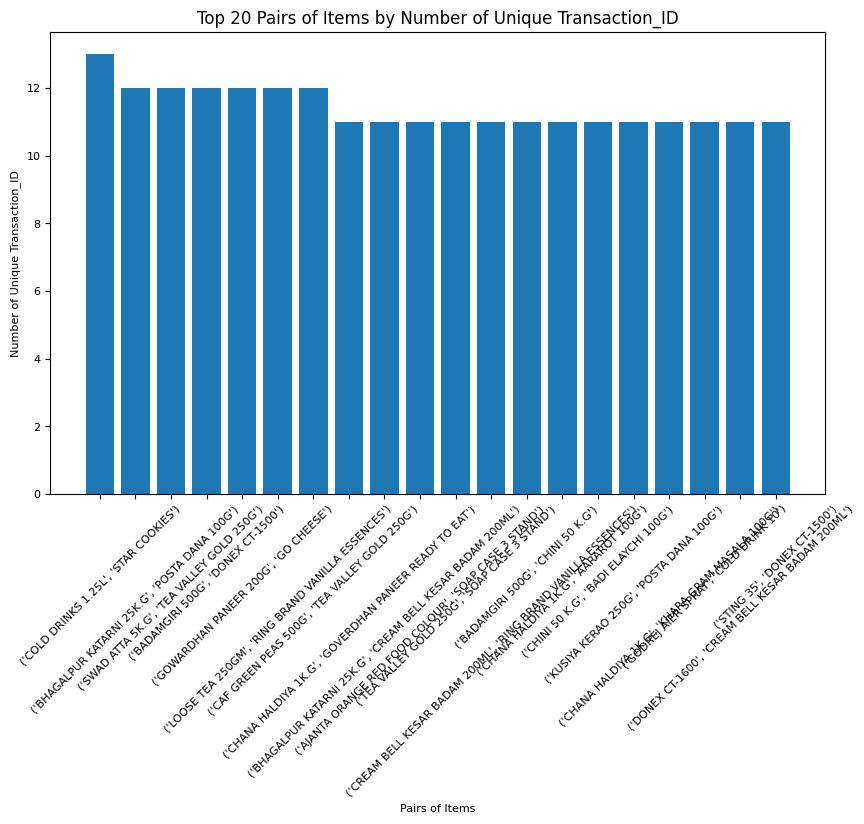

In [36]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

# Assuming 'result_df' is your original DataFrame
temp_df = result_df[['Transaction_ID', 'Item']]

# Drop duplicate entries in the 'Transaction_ID' column
temp_df = temp_df.drop_duplicates(subset=['Transaction_ID', 'Item'])

# Create a list of unique items for each 'Transaction_ID'
item_lists = temp_df.groupby('Transaction_ID')['Item'].apply(list)

# Filter out transactions with only one item
item_lists = item_lists[item_lists.apply(len) > 1]

# Create pairs of items within each 'Transaction_ID'
pairs = []
for transaction_id, items in item_lists.items():
    for pair in combinations(items, 2):
        pairs.append({'Transaction_ID': transaction_id, 'pairs': pair})

# Create a DataFrame from the pairs list
pairs_df = pd.DataFrame(pairs)

# Count the occurrences of each pair and number of unique 'Transaction_ID'
pair_counts = pairs_df.groupby('pairs')['Transaction_ID'].nunique().reset_index()
pair_counts.columns = ['pairs', 'transaction_id_count']

# Sort by 'transaction_id_count' in descending order
pair_counts = pair_counts.sort_values('transaction_id_count', ascending=False)

# Print the top 20 pairs based on 'transaction_id_count'
print("Top 20 pairs of items based on the number of 'Transaction_ID':")
for idx, row in pair_counts.head(20).iterrows():
    print(f"{row['pairs']}: {row['transaction_id_count']}")

# Plot the top 20 pairs
top_20_pairs = [str(pair) for pair in pair_counts.head(20)['pairs']]
top_20_counts = pair_counts.head(20)['transaction_id_count']

plt.figure(figsize=(10, 6))
plt.bar(top_20_pairs, top_20_counts)
plt.xticks(rotation=45)
plt.xlabel('Pairs of Items')
plt.ylabel('Number of Unique Transaction_ID')
plt.title('Top 20 Pairs of Items by Number of Unique Transaction_ID')
plt.show()

# Paretto analysis


---



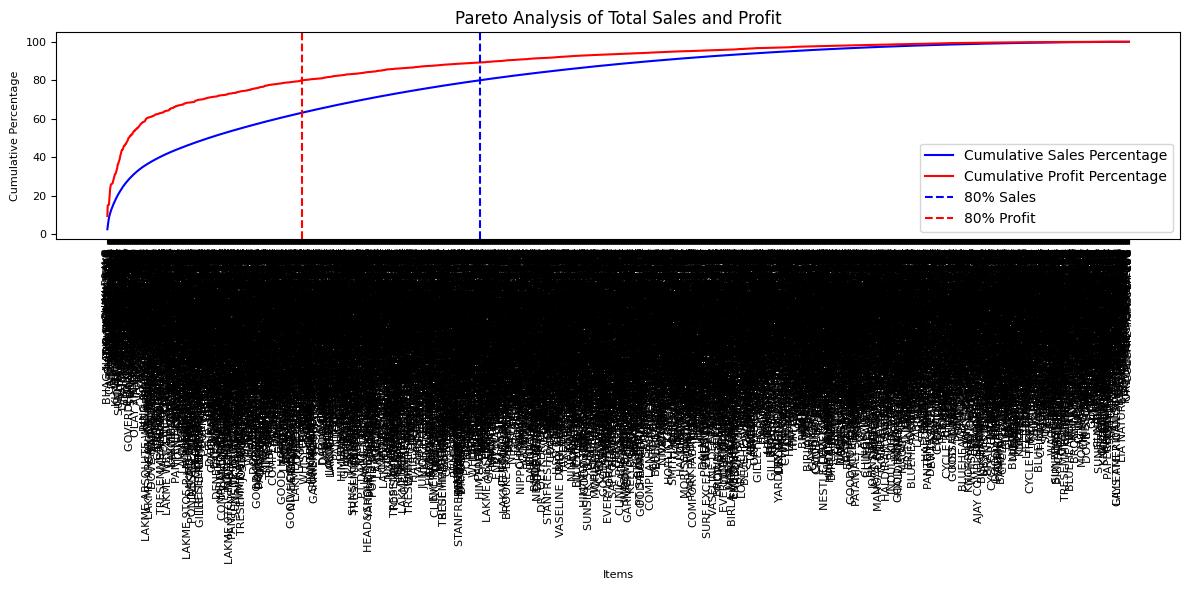

In [59]:
# prompt: Generate plot for Preto analysis of Profit and total sale. Represent on same graph using differnt color. Also clearly draw lines showing 80-20 analysis.

# Assuming 'result_df' is your DataFrame with the necessary data

# Calculate total sales and total profit for each item
item_performance = result_df.groupby('Item').agg({'Total_Price': 'sum', 'Net_Profit': 'sum'})

# Sort items by total sales in descending order
item_performance = item_performance.sort_values('Total_Price', ascending=False)

# Calculate cumulative percentage of total sales and profit
item_performance['cumulative_sales_percentage'] = (item_performance['Total_Price'].cumsum() / item_performance['Total_Price'].sum()) * 100
item_performance['cumulative_profit_percentage'] = (item_performance['Net_Profit'].cumsum() / item_performance['Net_Profit'].sum()) * 100

# Create the plot
plt.figure(figsize=(12, 6))

# Plot total sales
plt.plot(item_performance.index, item_performance['cumulative_sales_percentage'], label='Cumulative Sales Percentage', color='blue')

# Plot total profit
plt.plot(item_performance.index, item_performance['cumulative_profit_percentage'], label='Cumulative Profit Percentage', color='red')

# Add vertical lines for 80% mark
plt.axvline(x=item_performance[item_performance['cumulative_sales_percentage'] >= 80].index[0], color='blue', linestyle='--', label='80% Sales')
plt.axvline(x=item_performance[item_performance['cumulative_profit_percentage'] >= 80].index[0], color='red', linestyle='--', label='80% Profit')

# Customize the plot
plt.xlabel('Items')
plt.ylabel('Cumulative Percentage')
plt.title('Pareto Analysis of Total Sales and Profit')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Product Performance Analysis
- Identify top-selling and most profitable products
- Analyze product margins and pricing strategies



1.   **Identify top-selling and most profitable products:**


---





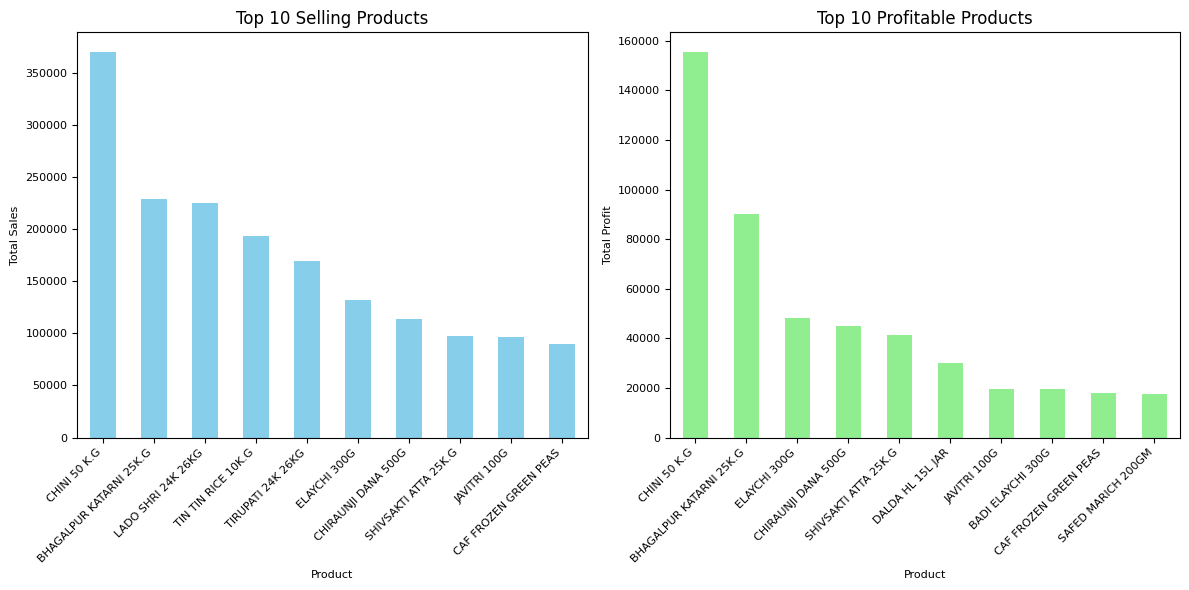

In [38]:
# prompt: using result_df, identify top selling and most profitable product. give me top 5 in each category. Plot them together in single graph

import matplotlib.pyplot as plt
# Calculate total sales for each product
top_selling_products = result_df.groupby('Item')['Total_Price'].sum().sort_values(ascending=False).head(10)

# Calculate profit for each product (Sale_price - Cost Price)
result_df['Profit'] = result_df['Sale_price'] - result_df['Cost Price']
top_profitable_products = result_df.groupby('Item')['Profit'].sum().sort_values(ascending=False).head(10)

# Plot top-selling and top-profitable products together
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
top_profitable_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Profitable Products')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


**2. Analyze product margins and pricing strategies**


---






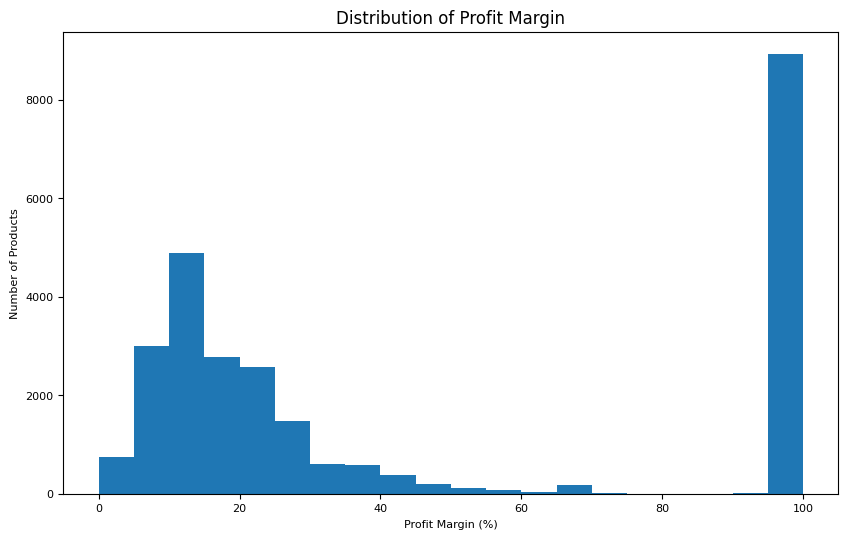

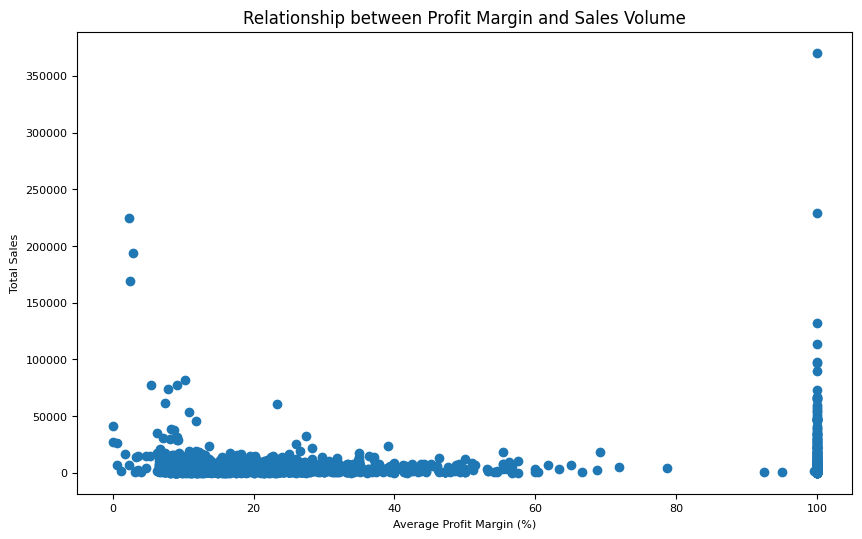

Pricing Analysis:
                        Average_Selling_Price  Average_Cost_Price
Item                                                             
  BABY CARE COLLECTION                  400.0              329.60
 500G KHIR CHAWAL                        50.0                0.00
 BABY CARE COLLECTION                   210.0              189.53
 BABY POWDER 100G                        83.0               67.26
 BABY POWDER 200G                       150.0              121.55
 GOOD DAY 5                               5.0                0.00
 LIA CYCLE U SPIRIT                      20.0               16.66
24 KARET 5KG                            225.0                0.00
24 KARET RICE 1 K.G                      46.0                0.00
AARAROT 100G                              6.0                0.00

Average Profit Margin by Product (Top 10):
Item
AARAROT 100G                 100.0
hIDE & SICK - 10RS           100.0
ZZZZZZ 3                     100.0
 500G KHIR CHAWAL            100.0
2

In [39]:
# prompt: on result df, Analyze product margins and pricing strategies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of result_df to avoid modifying the original
filtered_df = result_df.copy()

# Filter out records with negative profit in the new DataFrame
filtered_df = filtered_df[filtered_df['Sale_price'] >= filtered_df['Cost Price']]

# Calculate profit margin for each product in the new DataFrame, avoiding division by zero
filtered_df['Profit_Margin'] = (filtered_df['Sale_price'] - filtered_df['Cost Price']) / filtered_df['Sale_price'] * 100
filtered_df['Profit_Margin'] = filtered_df['Profit_Margin'].replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN


# Group by product and calculate average profit margin using the filtered DataFrame
average_profit_margin = filtered_df.groupby('Item')['Profit_Margin'].mean().sort_values(ascending=False)

# Analyze pricing strategies using the filtered DataFrame
# You could compare the average selling price of products to their cost price to see how pricing is affecting profits
average_selling_price = filtered_df.groupby('Item')['Sale_price'].mean()
average_cost_price = filtered_df.groupby('Item')['Cost Price'].mean()
pricing_analysis = pd.DataFrame({'Average_Selling_Price': average_selling_price, 'Average_Cost_Price': average_cost_price})

# Explore the relationship between profit margin and sales volume using the filtered DataFrame
# Analyze if higher profit margin products are also high-volume sellers
product_performance = filtered_df.groupby('Item').agg({'Profit_Margin': 'mean', 'Total_Price': 'sum'})

# Visualize the profit margin distribution for different products using the filtered DataFrame
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Profit_Margin'].dropna(), bins=20)  # Drop NaN values before plotting
plt.xlabel('Profit Margin (%)')
plt.ylabel('Number of Products')
plt.title('Distribution of Profit Margin')
plt.show()

# Visualize the relationship between profit margin and sales volume using the filtered DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(product_performance['Profit_Margin'], product_performance['Total_Price'])
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Total Sales')
plt.title('Relationship between Profit Margin and Sales Volume')
plt.show()

# Analyze pricing strategies
print("Pricing Analysis:")
print(pricing_analysis.head(10))

# Analyze product margins
print("\nAverage Profit Margin by Product (Top 10):")
print(average_profit_margin.head(10))

# You can further investigate:
# - Products with consistently high or low profit margins
# - The impact of discounts on profit margin
# - The relationship between pricing and sales volume for different products
# - The possibility of optimizing pricing strategies for improved profitability



In [40]:
# Further investigations:

# 1. Products with consistently high or low profit margins
high_profit_margin_products = average_profit_margin[average_profit_margin > average_profit_margin.quantile(0.85)].index.tolist()
low_profit_margin_products = average_profit_margin[average_profit_margin < average_profit_margin.quantile(0.1)].index.tolist()

# Create a DataFrame with the two lists
df_comparison = pd.DataFrame({
    'High Profit Margin Products': high_profit_margin_products[:15],  # Take only the top 10 elements
    'Low Profit Margin Products': low_profit_margin_products[:15]   # Take only the top 10 elements
})

# Print the DataFrame
print(df_comparison)


   High Profit Margin Products       Low Profit Margin Products
0                 AARAROT 100G     GODREJ MAGIC BODY WASH 200ML
1           hIDE & SICK - 10RS     GODREJ MAGIC NODY WASH COMBI
2                     ZZZZZZ 3    HERSHEY'S CHOCLATE SYRUP 200G
3             500G KHIR CHAWAL            CLOSEUP RED HOT 80G N
4          24 KARET RICE 1 K.G                 NESTLE KITKAT 10
5                 24 KARET 5KG             DAIRY MILK CRISPELLO
6                   GOOD DAY 5               CADBURY  SHOTS 18G
7               AB CLOTH BRUSH                    MAGIX ELAICHI
8       AJANTA CHOCLATE POWDER           BROOKE BOND TAAZA 100G
9    AJANTA BAKING POWDER 100G       BROOKE BOND RED LABEL 100G
10                 AJWAIN 200G   CADBURY CHOCOBAKES COOKIES 20G
11                     AJMAYIN                 PERK DOU BLE 26G
12  GOLDEN VANILA ICE CREAM 65  GLOW & HANDSOME MEN'S CREAM 50G
13                    GOOD DAY                    KIT KAT 12.8G
14        GOOD DAY BISC - 10RS         C

**3. Profitability Analysis**


---



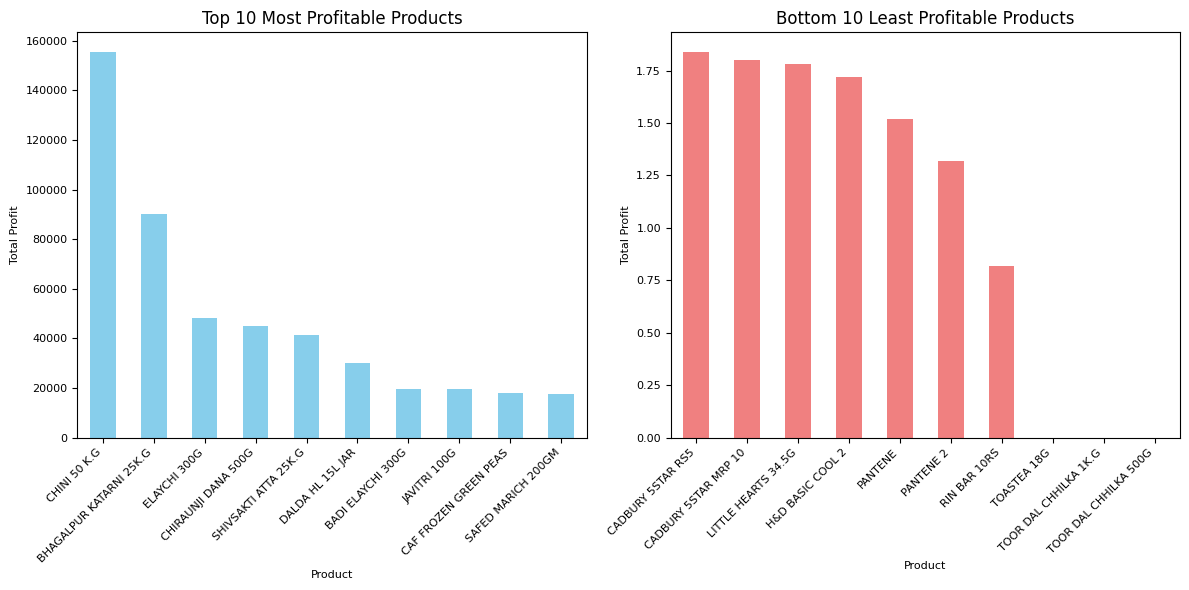

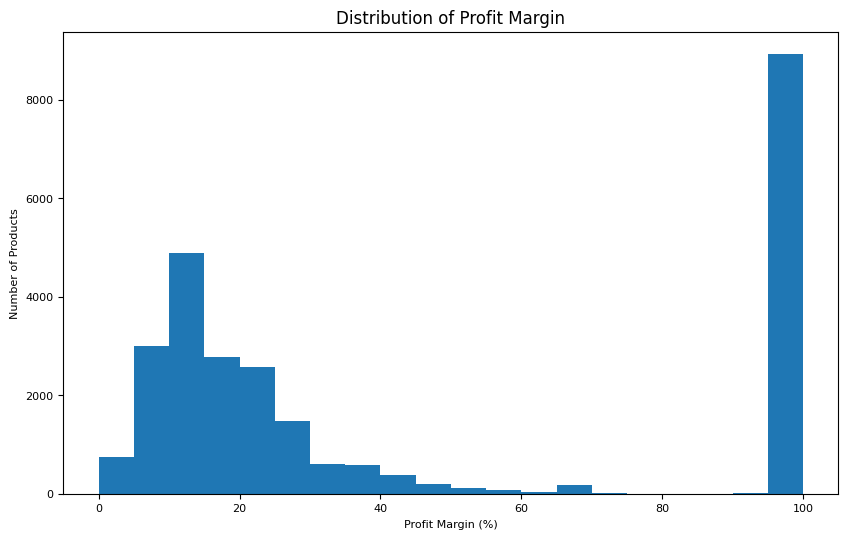

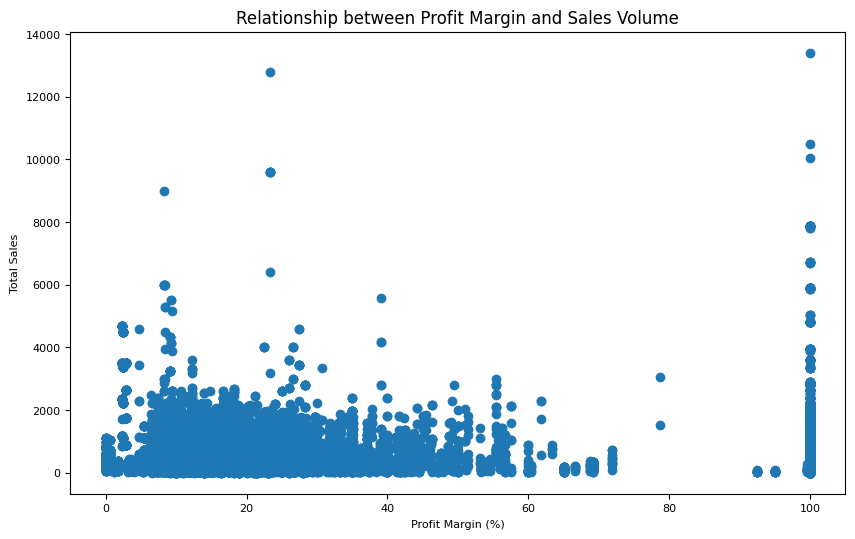

## Profitability Analysis Summary
**Top 10 Most Profitable Products:**
                           Profit  Profit_Margin
Item                                            
CHINI 50 K.G             155630.0          100.0
BHAGALPUR KATARNI 25K.G   90000.0          100.0
ELAYCHI 300G              48180.0          100.0
CHIRAUNJI DANA 500G       44800.0          100.0
SHIVSAKTI ATTA 25K.G      41470.0          100.0
DALDA HL 15L JAR          30150.0          100.0
BADI ELAYCHI 300G         19440.0          100.0
JAVITRI 100G              19440.0          100.0
CAF FROZEN GREEN PEAS     17760.0          100.0
SAFED MARICH 200GM        17750.0          100.0

**Bottom 10 Least Profitable Products:**
                       Profit  Profit_Margin
Item                                        
CADBURY 5STAR RS5        1.84            9.2
CADBURY 5STAR MRP 10     1.80            9.0
LITTLE HEARTS 34.5G      1.78            8.9
H&D BASIC COOL 2         1.72           21.5
PANTENE                  1.52

In [41]:
# prompt: On result_df, perform Profitability Analysis:
# Evaluate the profitability of individual products and product
# categories by analyzing factors such as cost price, selling price, discounts, and profit
# margins. Identify high-margin items and underperforming products for strategic decision-
# making. Explain with multiple plots and then summarize the result

import matplotlib.pyplot as plt
import numpy as np

# Calculate profit for each product
result_df['Profit'] = result_df['Sale_price'] - result_df['Cost Price']

# Identify products with negative profit
negative_profit_products = result_df[result_df['Profit'] < 0]['Item'].unique()

# Remove negative profit records
result_df = result_df[result_df['Profit'] >= 0]

# Calculate profit margin for each product
result_df['Profit_Margin'] = (result_df['Sale_price'] - result_df['Cost Price']) / result_df['Sale_price'] * 100

# Analyze profitability by product
product_profitability = result_df.groupby('Item').agg({'Profit': 'sum', 'Profit_Margin': 'mean'})

# Sort by total profit in descending order
product_profitability = product_profitability.sort_values('Profit', ascending=False)

# Identify top 10 most profitable products
top_10_profitable_products = product_profitability.head(10)

# Identify bottom 10 least profitable products
bottom_10_profitable_products = product_profitability.tail(10)

# Visualize profitability by product
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_10_profitable_products['Profit'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
bottom_10_profitable_products['Profit'].plot(kind='bar', color='lightcoral')
plt.title('Bottom 10 Least Profitable Products')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Analyze profit margin distribution
plt.figure(figsize=(10, 6))
plt.hist(result_df['Profit_Margin'][~np.isinf(result_df['Profit_Margin'])].dropna(), bins=20)
plt.xlabel('Profit Margin (%)')
plt.ylabel('Number of Products')
plt.title('Distribution of Profit Margin')
plt.show()

# Analyze relationship between profit margin and sales volume
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Profit_Margin'], result_df['Total_Price'])
plt.xlabel('Profit Margin (%)')
plt.ylabel('Total Sales')
plt.title('Relationship between Profit Margin and Sales Volume')
plt.show()

# Summary of Profitability Analysis:
print("## Profitability Analysis Summary")
print("**Top 10 Most Profitable Products:**")
print(top_10_profitable_products)
print("\n**Bottom 10 Least Profitable Products:**")
print(bottom_10_profitable_products)
print("\n**Products with Negative Profit:**")
print(negative_profit_products)

# Further analysis:
# Investigate products with consistently high/low profit margins.
# Evaluate the impact of discounts on profit margin.
# Analyze the relationship between pricing and sales volume for different products.
# Optimize pricing strategies for improved profitability.


# Customer Behaviour Analysis

In [42]:
# prompt: on result DF, Customer Behaviour Analysis
# - Analyze purchase patterns and preferences
# - Identify popular product combinations and cross-selling opportunities
# - Segment customers based on purchase behaviour. Give me running/uncommented code

# Analyze purchase patterns and preferences
customer_purchase_frequency = result_df.groupby('Transaction_ID')['Item'].nunique().sort_values(ascending=False)
average_items_per_transaction = customer_purchase_frequency.mean()
print(f"Average number of items per transaction: {average_items_per_transaction}")

# Identify popular product combinations and cross-selling opportunities
# (This is often done using market basket analysis, as shown previously)

# Segment customers based on purchase behaviour
# You can create customer segments based on various factors like:
# - Total spending: High-value customers, medium-value customers, low-value customers
# - Purchase frequency: Frequent customers, occasional customers
# - Preferred product categories: Customers who buy mostly groceries, electronics, etc.

# Example: Segment customers based on total spending
customer_total_spending = result_df.groupby('Transaction_ID')['Total_Price'].sum().sort_values(ascending=False)
spending_quantiles = customer_total_spending.quantile([0.25, 0.75])

# Create customer segments
high_value_customers = customer_total_spending[customer_total_spending >= spending_quantiles[0.75]].index.tolist()
medium_value_customers = customer_total_spending[(customer_total_spending >= spending_quantiles[0.25]) & (customer_total_spending < spending_quantiles[0.75])].index.tolist()
low_value_customers = customer_total_spending[customer_total_spending < spending_quantiles[0.25]].index.tolist()

print(f"Number of high-value customers: {len(high_value_customers)}")
print(f"Number of medium-value customers: {len(medium_value_customers)}")
print(f"Number of low-value customers: {len(low_value_customers)}")

# Further analysis within each segment:
# - Analyze product preferences within each segment
# - Identify differences in purchase patterns across segments
# - Develop targeted marketing campaigns based on segment characteristics


# Example: Analyze product preferences within high-value customers
high_value_customer_df = result_df[result_df['Transaction_ID'].isin(high_value_customers)]
top_products_high_value = high_value_customer_df.groupby('Item')['Total_Price'].sum().sort_values(ascending=False).head(10)
print("Top 10 products for high-value customers:")
print(top_products_high_value)


Average number of items per transaction: 5.817470956210903
Number of high-value customers: 1120
Number of medium-value customers: 2237
Number of low-value customers: 1119
Top 10 products for high-value customers:
Item
CHINI 50 K.G               366420.0
BHAGALPUR KATARNI 25K.G    226800.0
LADO SHRI 24K 26KG         223470.0
TIN TIN RICE 10K.G         191625.0
TIRUPATI 24K 26KG          163520.0
ELAYCHI 300G               122760.0
CHIRAUNJI DANA 500G        107800.0
JAVITRI 100G                91680.0
SHIVSAKTI ATTA 25K.G        90805.0
CAF FROZEN GREEN PEAS       80640.0
Name: Total_Price, dtype: float64


# Operational Efficiency Analysis


---



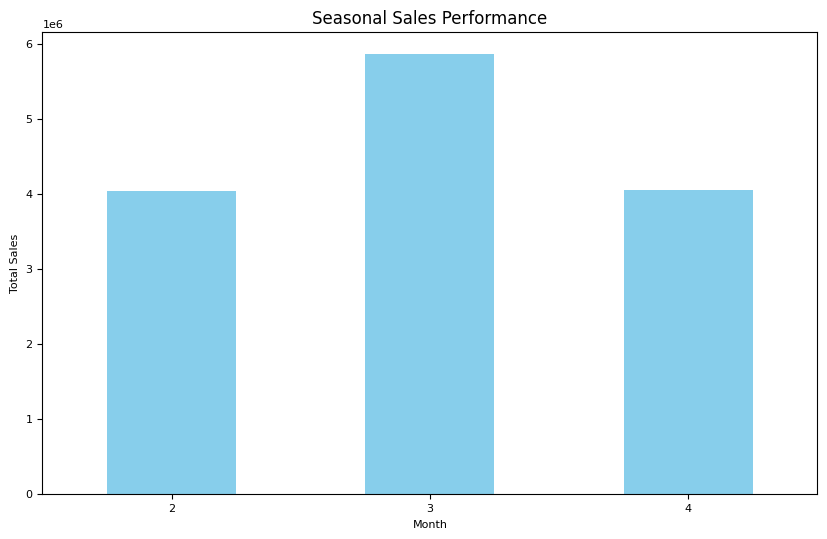

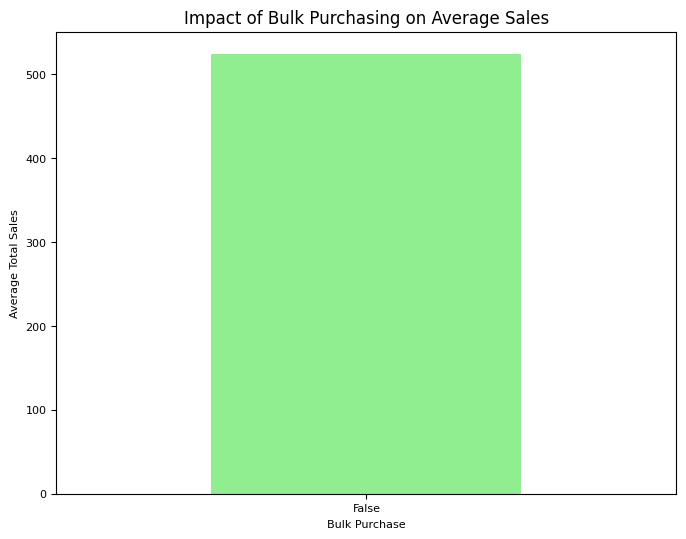

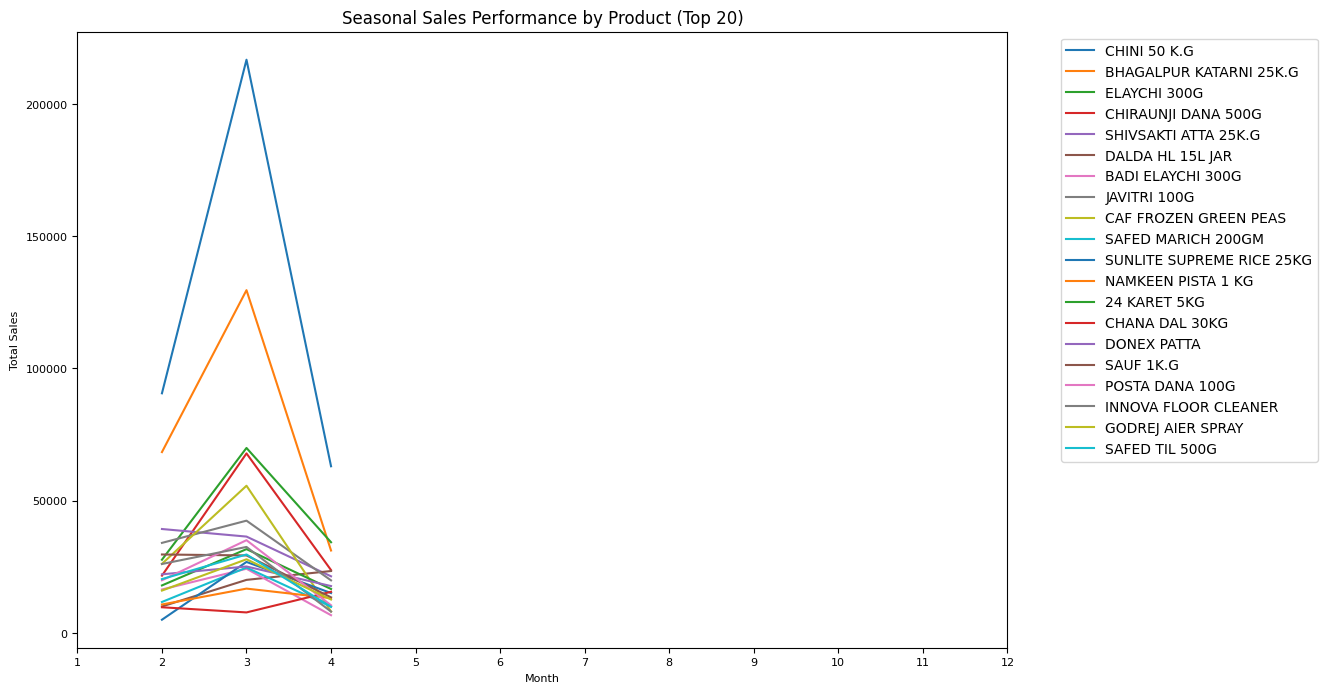

In [43]:
# prompt: by analysing result_df, Operational Efficiency Analysis
# # - Assess the impact of seasonal offerings, plot it
# # - Evaluate the effectiveness of bulk purchasing strategies , plot it
# - create Seasonal Sales Performance by Product' plot, limit to top 20 products (products with highest profit)

import matplotlib.pyplot as plt
# Operational Efficiency Analysis

# Assess the impact of seasonal offerings
# Assuming 'result_df' has a 'Season' column indicating the season (e.g., Summer, Winter)
seasonal_sales = result_df.groupby('Month')['Total_Price'].sum()

plt.figure(figsize=(10, 6))
seasonal_sales.plot(kind='bar', color='skyblue')
plt.title('Seasonal Sales Performance')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

# Evaluate the effectiveness of bulk purchasing strategies
# Assuming 'result_df' has a 'Quantity' column indicating the number of items purchased
result_df['Bulk_Purchase'] = result_df['Quantity'] > 10  # Define a threshold for bulk purchases
bulk_purchase_analysis = result_df.groupby('Bulk_Purchase')['Total_Price'].mean()

plt.figure(figsize=(8, 6))
bulk_purchase_analysis.plot(kind='bar', color='lightgreen')
plt.title('Impact of Bulk Purchasing on Average Sales')
plt.xlabel('Bulk Purchase')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=0)
plt.show()


# Create 'Seasonal Sales Performance by Product' plot, limit to top 20 products (products with highest profit)
top_20_profitable_products = result_df.groupby('Item')['Profit'].sum().sort_values(ascending=False).head(20).index.tolist()
seasonal_product_sales = result_df[result_df['Item'].isin(top_20_profitable_products)].groupby(['Month', 'Item'])['Total_Price'].sum().reset_index()

plt.figure(figsize=(12, 8))
for product in top_20_profitable_products:
  product_data = seasonal_product_sales[seasonal_product_sales['Item'] == product]
  plt.plot(product_data['Month'], product_data['Total_Price'], label=product)

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Seasonal Sales Performance by Product (Top 20)')
plt.xticks(range(1, 13))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()
